<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

## Ice-age dynamics: 4. Paleo-climate
## Ice-core data
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we play with a carbon-dioxide record from different ice cores in  **Antarctica**, 
and load and plot stable hydrogen isotope data from the **VOSTOK and Dome C ice cores** in Antarctica, 
using `python`.

We first initialize the `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

----
## CO$_2$ concentrations from different ice cores in Antarctica

Next, read read in the data. In the `data` folder, there is a file called `Antarctica_CO2.x`. 
It has 137 comment lines ('#'), providing the meta-data. Then, the data set contains ages
(`age_gas_calBP`), the CO$_2$ concentration (`co2_ppm`), and its 1-$\sigma$ uncertainty
(`co2_1s_ppm`). 

The record is a **composite record**, a stack, from CO$_2$ measurements in entrapped
ice bubbles in the ice, form seven ice cores (see meta-data). Data are from:

- Lüthi, D., Le Floch, M., Bereiter, B. et al. (2008).
High-resolution carbon dioxide concentration record 650,000–800,000 years before present. *Nature*, 453, 379–382. (2008).

- Bernhard Bereiter, Sarah Eggleston, Jochen Schmitt, Christoph Nehrbass-Ahles, Thomas F. Stocker, 
Hubertus Fischer, Sepp Kipfstuhl, Jerome Chappellaz (2014): 
Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present,
*Geophy. Res. Lett.*, 42 (2), 542-549.

It's structure is:

|age_gas_calBP   | co2_ppm | co2_1s_ppm |
|----------------|---------|------------|
|-51.03          |368.02   |0.06        |
|-48.00          |361.78   |0.37        |
|-46.28          |359.65   |0.10        |

We read this file in with the `loadtxt` module of `numpy` into a common array `data`. 

In [2]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/Antarctica_CO2.x'
data=np.loadtxt(fname=infile1,skiprows=138)
print (type(data),data.shape)

<class 'numpy.ndarray'> (1901, 3)


Next, we plot the data. To be more flexible, we embed the entire plotting task to a function. As last line, we call the function to test it.

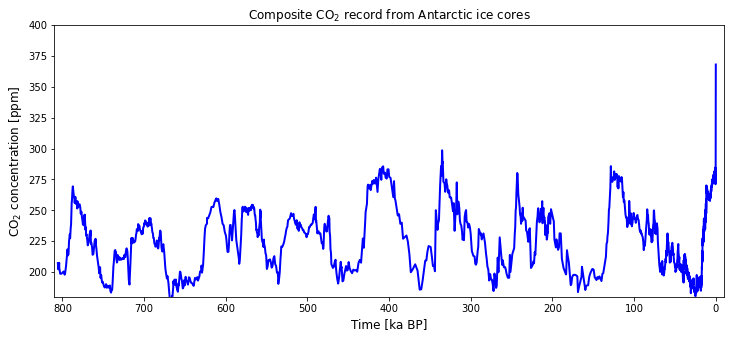

In [3]:
#-----------------------------------------------------------------------
# define function to plot 
#-----------------------------------------------------------------------
def co2_plot():
    plt.figure(figsize=(12.0, 5.0))
    plt.xlabel('Time [ka BP]',size=12)
    plt.ylabel('CO$_2$ concentration [ppm]',size=12)
    plt.title('Composite CO$_2$ record from Antarctic ice cores',size=12)
    plt.plot(data[:,0]/1000,data[:,1],color='blue',linestyle='-',linewidth=2)
    plt.xlim([810,-10])
    plt.ylim([180,400])
    plt.savefig('figures/CO2_Antarctica_composite.png',dpi=300)
    plt.show()
    
co2_plot()

Note that the CO$_2$ concentration during the ice-age cycles is always between
180 and 300 ppm, with peaks during interglacials. But there is a substantial rise
in CO$_2$ since the **industrial age**...

----
## Stable Hydrogen record in Vostok and Dome C ice cores

Here is another example from the lecture, the stable hydrogen records from the **Vostok** and the 
**Dome C** ice cores.

Note the use of different interactive elements, the *range slider* and the *checkbox*!

In [4]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/Vostok_dH.x'
year1=np.loadtxt(fname=infile1,skiprows=1,usecols=0)
Vostok_dH=np.loadtxt(fname=infile1,skiprows=1,usecols=1)
infile2='data/DomeC_dH.x'
year2=np.loadtxt(fname=infile2,skiprows=1,usecols=0)
DomeC_dH=np.loadtxt(fname=infile2,skiprows=1,usecols=1)

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def dH_plot(minmax,vostok,domec):
    min = minmax[0]
    max = minmax[1]
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time [ka BP]',size=12)
    plt.ylabel('$\delta$H [\u2030]',size=12)
    plt.title('Hydrogen isotope record from ice cores',size=12)
    if (vostok):
        plt.plot(year1/1000,Vostok_dH,color='red',linestyle='-',linewidth=1,label='Vostok')
    if (domec):
        plt.plot(year2/1000,DomeC_dH,color='blue',linestyle='-',linewidth=1,label='Dome C')
    plt.xlim([max,min])
    plt.ylim([-500,-350])
    plt.legend(loc='upper right')
    plt.show()
    
# call interactive module
w = dict(minmax=widgets.IntRangeSlider(min=0,max=700,step=1,value=[1,700],continuous_update=False,description='time (years)'),
         vostok=widgets.Checkbox(value=True,description='Vostok',disabled=False),
         domec=widgets.Checkbox(value=False,description='Dome C',disabled=False))
output = widgets.interactive_output(dH_plot, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

----
## $\delta^{18}$O from Greenland ice core

The last example is the oxygen isotope record from the **GRIP ice core** in Greenland.
The data file, with 16 header lines, is `data/NGRIP_d18O.x`.

Data are from:

- North Greenland Ice Core Project Members (2004): 
High-resolution record of Northern Hemisphere climate extending into the last interglacial period. *Nature*, 431, 147-151.

In [5]:
#-----------------------------------------------------------------------
# read data into field
#-----------------------------------------------------------------------
infile1='data/NGRIP_d18O.x'
data=np.loadtxt(fname=infile1,skiprows=16)
print (type(data),data.shape)

<class 'numpy.ndarray'> (4918, 2)


In [6]:
def d18O_plot(minmax):
    min = minmax[0]
    max = minmax[1]
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time [ka BP]',size=12)
    plt.ylabel('$\delta^18$O [\u2030]',size=12)
    plt.title('Oxygen isotope record from Greenland (NGRIP)',size=12)
    plt.plot(data[:,0],data[:,1],color='red',linestyle='-',linewidth=1,label='NGRIP')

    plt.xlim([max,min])
    plt.ylim([-50,-30])
    plt.legend(loc='upper right')
    plt.show()
    
#d18O_plot([0.,100.])

# call interactive module
w = dict(minmax=widgets.IntRangeSlider(min=0,max=100,step=1,value=[1,100],
                                       continuous_update=False,description='time (years)'))
output = widgets.interactive_output(d18O_plot, w)
box = widgets.VBox([widgets.HBox([*w.values()]), output])
display(box)

... done